In [32]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import animation as ani

In [2]:
L = 1
N = 100
c = 1 
tmax = 1
dx = L/N
dt =0.001

X= [dx * i for i in range(N+1)]

A)

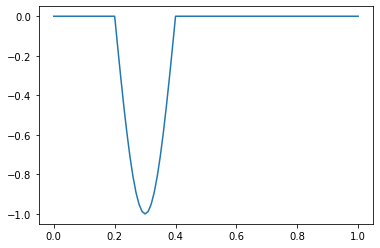

In [3]:
def init_string(X, case = 0):
    Y = []
    if case == 0:
        for x in X:
            y = math.sin(2 *np.pi* x)
            Y.append(y)
        Y[0] = 0
        Y[-1] = 0
    if case == 1:
        for x in X:
            y = math.sin(5 *np.pi* x)
            Y.append(y)
        Y[0] = 0
        Y[-1] = 0
    if case == 2:
            for x in X:
                if x > (1/5) and x< (2/5):
                    y = math.sin(5 *np.pi* x)
                else:
                    y = 0
                Y.append(y)
    return(Y)

Y = init_string(X,2)
plt.plot(X,Y)
plt.show()

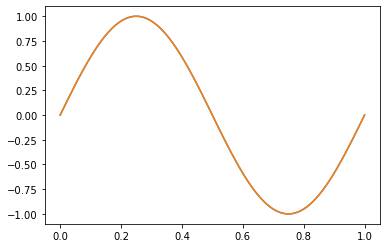

In [4]:
def update_string(Y, Y_prev):
    Y_next = []
    for i in range(len(Y)-1):
        y = c**2 * ((dt)**2 / (dx)**2) * (Y[i+1] + Y[i-1] - 2*Y[i])- Y_prev[i] + 2*Y[i]
        Y_next.append(y)
    Y_next.append(0)
    Y_next[0] = 0
    return(Y_next)

Y_prev = init_string(X)
Y = np.copy(Y_prev)
plt.plot(X,Y)
Y = update_string(Y, Y_prev)

plt.plot(X,Y)
plt.show()

B)

In [21]:
def init_string(X, case = 0):
    Y = []
    if case == 0:
        for x in X:
            y = math.sin(2 *np.pi* x)
            Y.append(y)
        Y[0] = 0
        Y[-1] = 0
    if case == 1:
        for x in X:
            y = math.sin(5 *np.pi* x)
            Y.append(y)
        Y[0] = 0
        Y[-1] = 0
    if case == 2:
            for x in X:
                if x > (1/5) and x< (2/5):
                    y = math.sin(5 *np.pi* x)
                else:
                    y = 0
                Y.append(y)
    return(Y)

In [30]:
def plot_wave(X, c):
    Y = init_string(X, c)
    Y_prev = np.copy(Y)
    for t in range(1000):
        Y_new = update_string(Y, Y_prev)
        if t%150 == 0:
            Time = 0.001 * t
            plt.plot(X, Y_new, label = "t = %f"%Time )
        Y_prev = Y
        Y = Y_new
    plt.legend()
    plt.show()

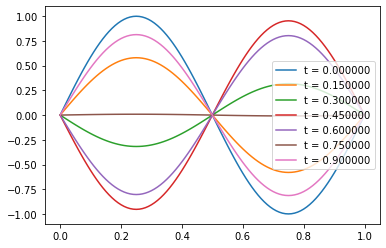

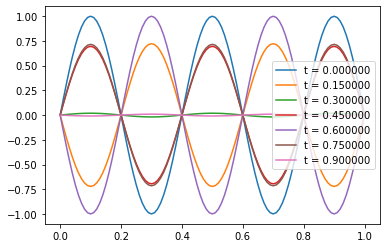

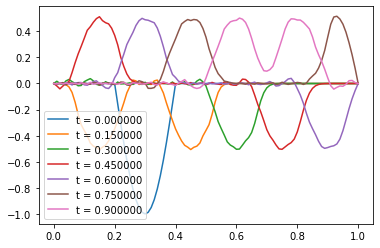

In [31]:
for i in range(3):
    plot_wave(X,i)

MovieWriter ffmpeg unavailable; trying to use pillow instead.


TypeError: 'str' object is not callable

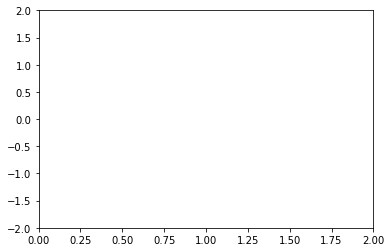

In [36]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

Y_CURRENT = init_string(X, 0)
Y_PREV = np.copy(Y_CURRENT)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 1, 1000)
    y = update_string(y_current, y_prev)
    line.set_data(x, y)
    Y_PREV = Y_CURRENT
    Y_CURRENT = y
    return line, 

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = ani.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()